<a href="https://colab.research.google.com/github/DorianD6/NBHV-G4360-Intro-Theory-2021/blob/main/Assignment_6_Dongrui_Deng(Correction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NBHV G4360 Introduction to Theoretical Neuroscience**

# **Assignment 6 by Dongrui Deng UNI:dd3001 (Corrected Version)**

## Problem 1: GLM: Linear-nonlinear Poisson Model

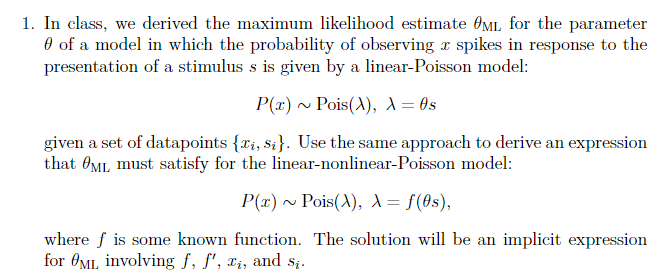

### **Linear-nonlinear Poisson Model**
rate: $λ=f(θs)$, $P(x)$~$Pois(λ)$, where $f$ is a known non-linear function and $x$ is the spike count

Poisson distribution: $P(x \mid λ) = \frac{1}{x!}{λ^x}{e^{-λ}}$, $P_θ(x \mid s) = \frac{1}{x!}{[f(θs)]^x}{e^{-f(θs)}}$

Suppose we have data $x =$ {$x_i$}, $s =$ {$s_i$}: $P_θ(x \mid s) = \displaystyle \prod_i P_θ(x_i \mid s_i)$ (conditional independence)

Find $θ = θ_{ML}$ to $ {max} {P_θ(x \mid s)} \Leftrightarrow {max}$ ${log P_θ(x \mid s)}$:

$log P_θ(x \mid s) = log \displaystyle \prod_i P_θ(x_i \mid s_i) = \sum_i log P_θ(x_i \mid s_i)$

$ log P_θ(x_i \mid s_i) = log\{ \frac{1}{x_i!}[f(θs_i)]^{x_i} e^{-f(θs_i)} \} = -log(x_i!) + x_i [logf(θs_i)] - f(θs_i)$

where $-log(x_i!)$ does not depend on $θ$ but the remaining two terms do

$ log P_θ(x \mid s) = \displaystyle \sum_i log P_θ(x_i \mid s_i) = \sum_i \{x_i [logf(θs_i)] - f(θs_i)\} + Const$

$ \Rightarrow \frac{\partial}{\partialθ} log P_θ(x \mid s) = \displaystyle \sum_ i[x_i \frac{s_if'(θs_i)}{f(θs_i)} - s_if'(θs_i)] = \sum_ i\{s_if'(θs_i)[\frac{x_i}{f(θs_i)} - 1]\} = 0$

$ \Rightarrow \displaystyle \sum_ i[s_if'(\frac{x_i}{f} - 1)] = 0$ where $f$ is the function of $θs_i$ is the implicit expression for $θ = θ_{ML}$

_____________________________________________________________

## Problem 2: Neurons Responses and Population Decoding

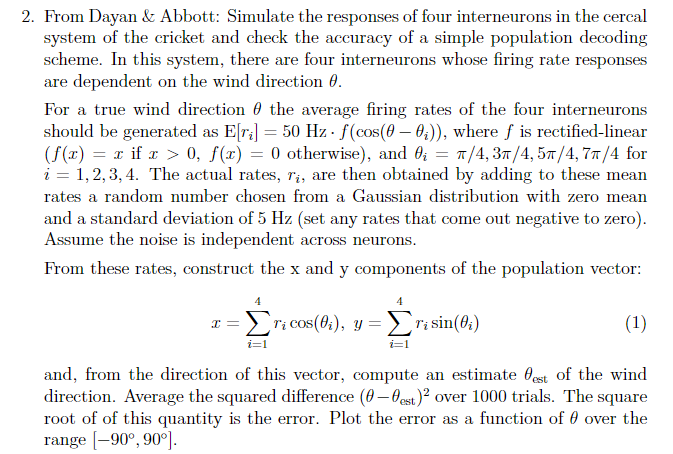

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the rectified-linear function
def ReLU(x):
  f = np.zeros(4)
  for i in range(4):
    if x[i] > 0:
      f[i] = x[i]
    else:
      f[i] = 0
  return f

In [ ]:
# Calculate rates, their x and y components, and theta_ests
a = np.pi/4
theta_i = [a, 3*a, 5*a, 7*a]
def rates(theta):
  E = 50 * ReLU(np.cos(np.ones(4)*theta - theta_i))
  r = E + np.random.normal(0,5,4)
  r[r<0] = 0
  x = np.sum(r * np.cos(theta_i))
  y = np.sum(r * np.sin(theta_i))
  theta_est = np.arctan2(y,x)
  return r, x, y, theta_est

In [ ]:
# Calculate the error of theta and theta_est
# as well as the average estimation of theta
def error(theta):
  var = 0
  theta_est_sum = 0
  for i in range(1000):
    r, x, y, theta_est = rates(theta)
    theta_est_sum = theta_est_sum + theta_est 
    var = var + (theta - theta_est) ** 2
  dev = var / 1000
  error = np.sqrt(dev)
  theta_est_avg = theta_est_sum / 1000
  return error, theta_est_avg

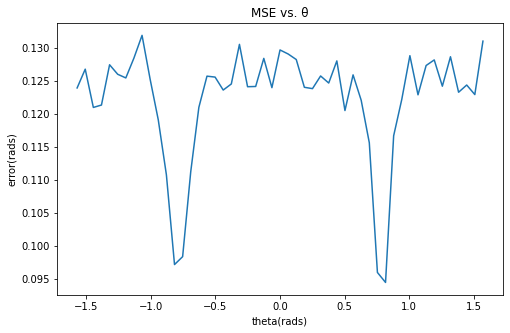

In [ ]:
# Plot the error as a function of theta over the range [-90°, 90°]
thetas = np.arange(-np.pi/2, np.pi*13/25, np.pi/50)
errors = np.zeros(51)
theta_est_avgs = np.zeros(51)
for k in range(51):
  errors[k],theta_est_avgs[k] = error(thetas[k])

plt.figure(figsize=(8,5))
plt.plot(thetas, errors)
plt.xlabel('theta(rads)')
plt.ylabel('error(rads)')
plt.title('MSE vs. θ')
plt.show()

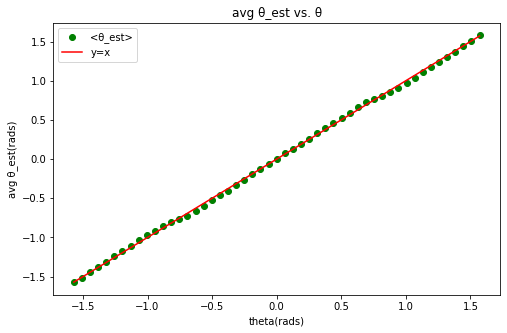

In [ ]:
# For a reference, plot the average estimated theta over 1000 trials
# corresponding to thetas over the range [-90°, 90°]
plt.figure(figsize=(8,5))
plt.plot(thetas, theta_est_avgs, 'go', label='<θ_est>')
plt.plot(thetas, thetas, 'r', label='y=x')
plt.xlabel('theta(rads)')
plt.ylabel('avg θ_est(rads)')
plt.title('avg θ_est vs. θ')
plt.legend()
plt.show()

## Problem 3: Fisher Information and Cramér-Rao Bound

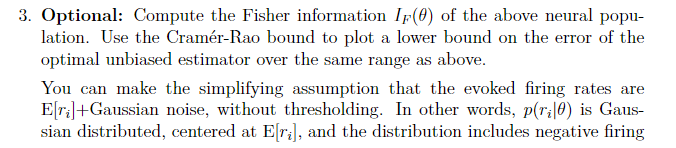

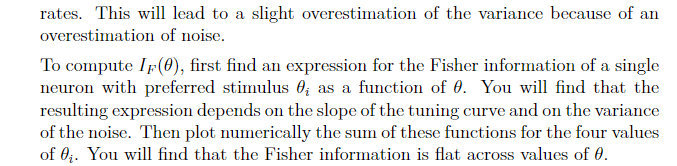

#### **Fisher Information and Cramér-Rao Bound** 

The Fisher information is given by:

> $I_F(θ) = E[(\frac{\partial}{\partial θ} \log p(\mathbf{r}|θ))^2]_{p(\mathbf{r} | θ)} = E[\frac{\partial^2}{\partial θ^2} \log p(\mathbf{r}|θ)]_{p(\mathbf{r} | θ)}$

In our problem, $p(r_i | θ) = p(r_i ; μ_i, σ^2)$ where $μ_i = μ_i(θ)$

Note: as stated in the problem $p(r_i | θ)$ here is Gaussian distributed

> $μ_i(θ) = 50Hz·f(cos(θ-θ_i))f,\ σ^2 = 5^2 = 25$

Use the chain role for theta, we have:

> $I_{Fi}(θ) = I_F(μ_i) · [μ_i'(θ)]^2$ where $I_F(μ_i) = \frac{1}{σ^2} (*)$ for $i=1,2,3,4$

$(*)$ represents Fisher information for Gaussian distribution is the inverse of the variance 

Meanwhile, $μ_i(θ) = 50Hz · f(cos(θ-θ_i))$

> $\mu_i'(θ) = -50Hz · f'(cos(θ-θ_i))·sin(θ-θ_i)$

where f is the ReLU here and with H = Heaviside step function,

> $[\mu_i'(θ)]^2 = 2500 · [H(cos(θ-θ_i))]^2 · sin^2(θ-θ_i)$


Thus, $I_{Fi}(θ) = \frac{1}{σ^2} · [μ_i'(θ)]^2 = 100 · [H(cos(θ-θ_i))]^2 · sin^2(θ-θ_i)$

Add Fisher information for individual neuron together, we finally obtain:

> $I_F(θ) = \displaystyle \sum_{i=1}^4 I_{Fi}(θ) = \sum_{i=1}^4 100 · [H(cos(θ-θ_i))]^2 · sin^2(θ-θ_i)$

If the estimator $θ_{est}$ is unbiased like here, the Cramér-Rao bound tells us:

> $Var (θ_{est} | θ) \geq \frac{1}{I_F (\theta)}$ where ${I_F (\theta)}$ is exactly the value we calculated above

For $(*)$, the proof is below:

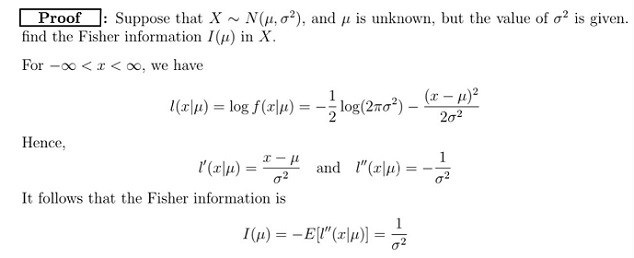

In [ ]:
# numerical plot
def FisherInfo(theta):
  cos = np.cos(theta - theta_i)
  # apply ReLU here
  H = np.heaviside(cos, 0.5)
  I_Fi = 100 * H**2 * (np.sin(theta - theta_i))**2  
  I_F = np.sum(I_Fi)
  return I_F

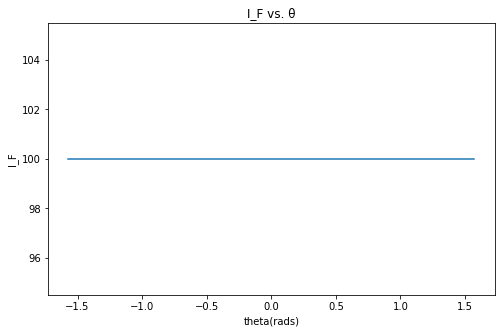

In [ ]:
I_Fs = np.zeros(51)
for j in range(51):
  I_Fs[j] = FisherInfo(thetas[j])
plt.figure(figsize=(8,5))
plt.plot(thetas,I_Fs)
plt.xlabel('theta(rads)')
plt.ylabel('I_F')
plt.title('I_F vs. θ')
plt.show()

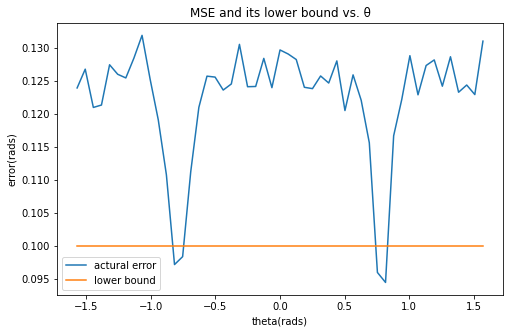

In [ ]:
# lower bound on the error
Var = 1 / I_Fs
err_lowb = np.sqrt(Var)
plt.figure(figsize=(8,5))
plt.plot(thetas, errors, label='actural error')
plt.plot(thetas, err_lowb, label='lower bound')
plt.xlabel('theta(rads)')
plt.ylabel('error(rads)')
plt.title('MSE and its lower bound vs. θ')
plt.legend()
plt.show()